# Logistic Regression Section Exercises

Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setul de date conține 14 atribute fizice ale unoor pacienți. Aceste atribute fizice spun dacă un anumit pacient suferă de o boală de inimă. Valoarea 0 ne spune că pacientul nu suferă de acea boală, iar valoarea 1 ne spune că persoana respectivă suferă de o boală de inimă.

Atributele sunt:

- age

- sex

- chest pain (4 values)

- resting blood presure

- serun cholestoral in mg/dl

- fasting blood sugar > 120 mg/dl

- resting electrocardiographic results (values 0, 1, 2)

- maximum heart rate achieved

- exercise induce anigina

- oldpeak = ST depresion induced by exercise relative to rest

- the slope of the peak exercise ST segment

- number of major vessels (0-3) colored by flourosopy

- thal: 3 = normal, 6 = fixed defect, 7 = reversable defect

- target: 0 for no presence of heart disease, 1 for presence of heart disease

1. Read the data (Fișierul poartă denumirea de '')

In [3]:
df = pd.read_csv('../data/DATA/heart.csv')

### Exploratory Data Analysis and Visualization

2. Print the head of the data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3. Explore if Dataset has missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

4. Describe all the numeric data from the Data set (min, max, std, etc)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


5. Create a bar plot that shows the total counts per target value

<AxesSubplot:xlabel='target', ylabel='count'>

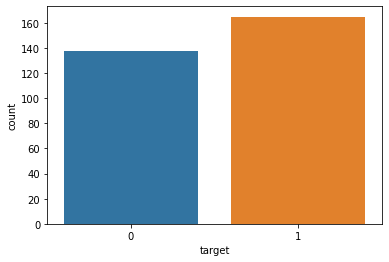

In [11]:
sns.countplot(x='target', data=df)

6. Create a pair plot to display the relationship between the following columns: age, trestbpd, chol, thalach, target

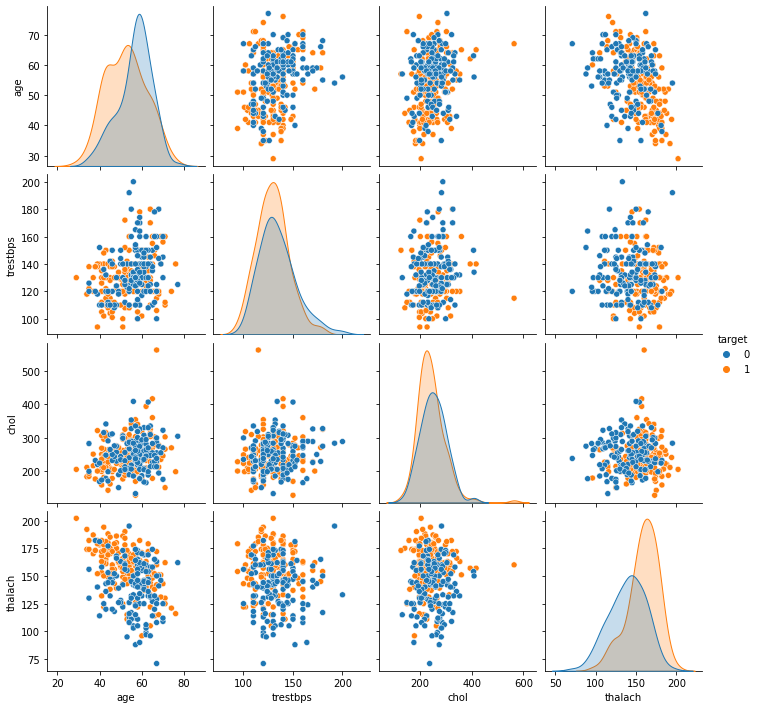

In [15]:
sns.pairplot(data=df, vars=['age', 'trestbps', 'chol', 'thalach'], hue='target')

7. Create a heatmap of the correlations

<AxesSubplot:>

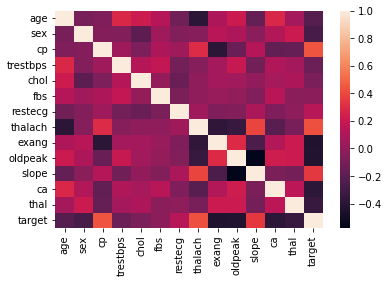

In [16]:
sns.heatmap(data=df.corr())

### Machine Learning

8. Separate the data into Features and labels

In [18]:
X = df.drop('target', axis=1)
y = df['target']

9. Split the data into train-test-split with a 10% test size and a 101 random state

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

10. Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

11. Create a Logistic Regression model

In [21]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

12. Perform Cross-Validation and GridSearch

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100],
            'max_iter': [100, 5000],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]}

grid_model = GridSearchCV(model, param_grid=param_grid, cv=5)

In [28]:
grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packag

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                         'max_iter': [100, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

13. Report back the best parameters of the model

In [29]:
grid_model.best_params_

{'C': 10, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l2'}

14. Report back the model's coefficients

In [30]:
grid_model.best_estimator_.coef_

array([[-0.0670491 , -0.78102916,  0.93745212, -0.27960569, -0.23325168,
         0.04701615,  0.12451924,  0.4525035 , -0.43679025, -0.54407786,
         0.40023348, -0.89460967, -0.59661323]])

15. Create a barplot of the coefficients and sort those values in the plot

In [55]:
coefs = pd.Series(index=X.columns,data=grid_model.best_estimator_.coef_[0])
coefs

age        -0.067049
sex        -0.781029
cp          0.937452
trestbps   -0.279606
chol       -0.233252
fbs         0.047016
restecg     0.124519
thalach     0.452504
exang      -0.436790
oldpeak    -0.544078
slope       0.400233
ca         -0.894610
thal       -0.596613
dtype: float64

In [58]:
coefs = coefs.sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ca'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'thal'),
  Text(3, 0, 'oldpeak'),
  Text(4, 0, 'exang'),
  Text(5, 0, 'trestbps'),
  Text(6, 0, 'chol'),
  Text(7, 0, 'age'),
  Text(8, 0, 'fbs'),
  Text(9, 0, 'restecg'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'thalach'),
  Text(12, 0, 'cp')])

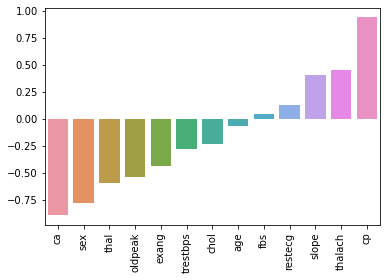

In [60]:
sns.barplot(x=coefs.index, y=coefs.values, )

plt.xticks(rotation=90)

### Model Performance evaluation

16. Create the model performance evaluation metrics (confusion matrix, plot, classification report)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

y_pred = grid_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [45]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


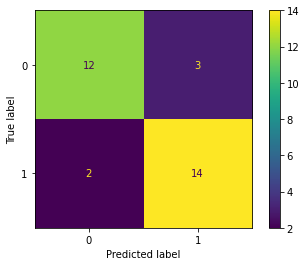

In [46]:
plot_confusion_matrix(grid_model.best_estimator_, X_test, y_test)

17. Plot the ROC curve and the precision-recall curve

In [47]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


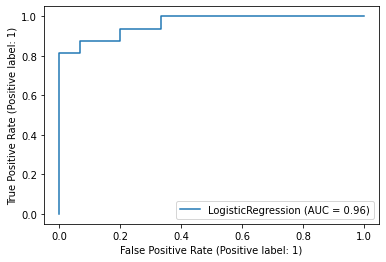

In [48]:
plot_roc_curve(grid_model.best_estimator_, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


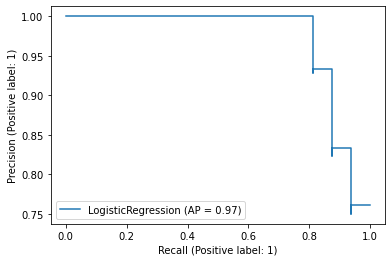

In [49]:
plot_precision_recall_curve(grid_model.best_estimator_, X_test, y_test)

### Predict for a new patient

18  Predict if a patient has a heart disease. The patient has the following Features:

1. age = 48.0

2. sex = 0.0

3. cp = 2.0 

4. trestbpd = 130.0

5. chol = 275.0

6. fbs = 0.0 

7. restecg = 1.0 

8. thalach = 139.0

9. exang = 0.0 

10. oldpeak = 0.2

11. slope = 2.0

12. ca = 0.0

13. thal = 2.0

In [64]:
features = [[51.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]
scaled_features = scaler.transform(features)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
predict = grid_model.predict(features)

In [66]:
predict

array([0])

In [63]:
grid_model.predict_proba(features)

array([[1.0000000e+00, 1.0013896e-17]])